In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from urllib import request
module_url = f"https://drive.google.com/uc?export=view&id=1ybQE6l3Yba_wW2wwmKVS_mSiNR8Yl04S"
module_name = 'marks.csv'
module_url2 = f"https://drive.google.com/uc?export=view&id=1yXTJRdccLRWnZq2pj9B-1oNBLIjFs7mU"
module_name2 = 'comments.csv'
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))
print(f'Fetching {module_url2}')
with request.urlopen(module_url2) as f, open(module_name2,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))
marks = pd.read_csv('marks.csv')
comments = pd.read_csv('comments.csv')

Fetching https://drive.google.com/uc?export=view&id=1ybQE6l3Yba_wW2wwmKVS_mSiNR8Yl04S
Fetching https://drive.google.com/uc?export=view&id=1yXTJRdccLRWnZq2pj9B-1oNBLIjFs7mU


In [48]:
marks.head(5)
# The value in each column represent percentage of marks you received from that part of the question.
# You can find the mark you got for each column by basically multiplying TOTAL MARKS row with your corresponding row.
# Columns in the end - "Q1 - Total",	"Q2 - Total",	"Q3 - Total", and "Overall - Mark" refer to your marks for each question.
# For querying your marks, please navigate to the next cell.

,Number,Q1.a - Test,Q1.a - Extra Test,Q1.a - Document,Q1.b - Test,Q1.b - Extra Test,Q1.b - Document,Q2.a - Test,Q2.a - Document,Q2.b - Test,...,Q3.1 - Test,Q3.1 - Document,Q3.2 - Test,Q3.2 - Document,Q3.3 - Test,Q3.3 - Document,Q1 - Total,Q2 - Total,Q3 - Total,Overall - Mark
0,TOTAL MARKS,6.5,3.9,2.6,6,3.6,2.4,16,4,7.2,...,9.6,2.4,14.4,3.6,8,2,25.00,35.00,40.00,100.00
1,C22106798,100.0,100.0,25.0,75,100.0,25.0,92,25,100.0,...,28.0,25.0,100.0,25.0,100,25,19.75,28.09,27.09,74.92
2,C22113539,80.0,85.0,25.0,80,85.0,25.0,100,25,100.0,...,100.0,25.0,100.0,25.0,100,25,17.63,28.02,34.00,79.65
3,C22083313,100.0,100.0,100.0,100,50.0,100.0,0,25,0.0,...,68.0,100.0,40.0,25.0,0,0,23.20,1.75,15.59,40.54
4,C21052346,80.0,85.0,100.0,80,85.0,100.0,100,100,100.0,...,100.0,100.0,100.0,25.0,100,25,21.38,35.00,35.80,92.18


In [49]:
# Find your mark
# replace the string 'TOTAL MARKS' below with your number 'C00000000'
# "C" will be capital
# The last column is your overall mark out of 100. 
# Max marks: Q1=25, Q2=35, and Q3=40.
your_number = 'TOTAL MARKS' 
your_marks = marks[marks['Number'] == your_number]
your_marks.iloc[:, [0, -4, -3, -2, -1]]

,Number,Q1 - Total,Q2 - Total,Q3 - Total,Overall - Mark
0,TOTAL MARKS,25.0,35.0,40.0,100.0


In [50]:
# Check your marker comments
# replace the string 'CR7' below with your number 'C00000000'
your_number = 'CR7' 
your_comments = comments[comments['Number'] == your_number]
for col in your_comments.columns:
    print(col, "--> ", your_comments[col].values[0])

Number -->  CR7
Q1 - Comments -->  GOAT
Q2.a - Comments -->  GOAT
Q2.b - Comments -->  GOAT
Q2.c - Comments -->  GOAT
Q3.1 - Comments -->  GOAT
Q3.2 - Comments -->  GOAT
Q3.3 - Comments -->  GOAT


In [51]:
# Create a dataframe for overall class statistics
marks.loc[:,'Q1.a - Test':].agg(['mean', 'median', 'std'])

,Q1.a - Test,Q1.a - Extra Test,Q1.a - Document,Q1.b - Test,Q1.b - Extra Test,Q1.b - Document,Q2.a - Test,Q2.a - Document,Q2.b - Test,Q2.b - Document,...,Q3.1 - Test,Q3.1 - Document,Q3.2 - Test,Q3.2 - Document,Q3.3 - Test,Q3.3 - Document,Q1 - Total,Q2 - Total,Q3 - Total,Overall - Mark
mean,79.563889,82.549444,80.625556,85.755556,91.964444,81.707778,83.200000,73.216667,84.167778,70.982222,...,83.142222,71.957778,76.746667,70.575556,76.622222,71.261111,21.039000,28.182000,31.056889,80.277222
median,85.000000,100.000000,100.000000,90.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,23.490000,31.110000,34.965000,88.580000
std,24.213092,31.578250,35.435859,22.978402,25.688327,34.310592,28.406152,35.313326,29.783406,36.421844,...,31.659759,33.984045,36.677532,35.232613,40.055430,35.478590,5.686256,9.118796,11.397726,23.559894


In [52]:
# Distribution of studens based on Mark
d = {'Fail':[0, 50], 'Pass':[50, 60], 'Merit':[60, 70], 'Distinction':[70, 100.1]}
perf = pd.DataFrame({'Mark':['Fail', 'Pass', 'Merit', 'Distinction']})
perf['Num Students'] = 0
for key, value in d.items():
    perf.loc[perf['Mark'] == key,'Num Students'] = marks[(marks['Overall - Mark']>=value[0])*(marks['Overall - Mark']<value[1])]['Overall - Mark'].agg(['count']).values[0]
perf['Percentage'] = 100*perf['Num Students']/perf['Num Students'].sum()
perf

,Mark,Num Students,Percentage
0,Fail,18,10.000000
1,Pass,2,1.111111
2,Merit,14,7.777778
3,Distinction,146,81.111111


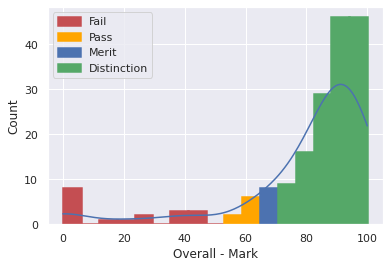

In [54]:
# Plot a histogram for total marks
sns.set(color_codes=True)
ax = sns.histplot(data=marks, x="Overall - Mark", linewidth=2.5, kde=True)
for p in ax.patches:
    if p.get_x() < 50:
        p.set_color('r')
        p.set_label('Fail')
    elif p.get_x() < 60:
        p.set_color('orange')
        p.set_label('Pass')
    elif p.get_x() < 70:
        p.set_color('b')
        p.set_label('Merit')
    else:
        p.set_color('g')
        p.set_label('Distinction')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())   

Text(0, 0.5, 'Total Mark')

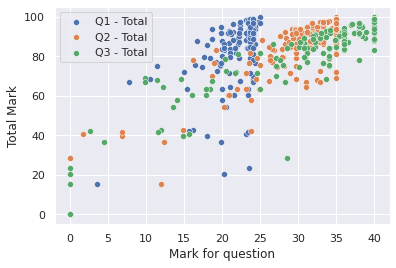

In [55]:
for col in ['Q1 - Total','Q2 - Total', 'Q3 - Total']: 
    sns.scatterplot(data=marks, x=col, y='Overall - Mark', label=col, palette='Set3')
plt.legend()
plt.xlabel('Mark for question')
plt.ylabel('Total Mark')

In [56]:
# Boxplot for each question
px.box(marks, x=['Q1 - Total', 'Q2 - Total', 'Q3 - Total', 'Overall - Mark'], width=600, height=400,
       labels={'value':'Marks', 'variable':'Question'}, template="simple_white", notched=True)